In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | rikitea
Processing Record 2 of Set 13 | bluff
Processing Record 3 of Set 13 | busteni
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | iquique
Processing Record 6 of Set 13 | ngukurr
City not found. Skipping...
Processing Record 7 of Set 13 | provideniya
Processing Record 8 of Set 13 | lubango
Processing Record 9 of Set 13 | hilo
Processing Record 10 of Set 13 | vaini
Processing Record 11 of Set 13 | ponta do sol
Processing Record 12 of Set 13 | kavieng
Processing Record 13 of Set 13 | upernavik
Processing Record 14 of Set 13 | auki
Processing Record 15 of Set 13 | iqaluit
Processing Record 16 of Set 13 | punta arenas
Processing Record 17 of Set 13 | port alfred
Processing Record 18 of Set 13 | san patricio
Processing Record 19 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 13 | jamestown
Processing Record 21 of Set 13 | candolim
Processing R

Processing Record 34 of Set 16 | sao miguel do tapuio
Processing Record 35 of Set 16 | woodward
Processing Record 36 of Set 16 | hambantota
Processing Record 37 of Set 16 | zeya
Processing Record 38 of Set 16 | ahipara
Processing Record 39 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 16 | sorland
Processing Record 41 of Set 16 | barrow
Processing Record 42 of Set 16 | paamiut
Processing Record 43 of Set 16 | san quintin
Processing Record 44 of Set 16 | catbalogan
Processing Record 45 of Set 16 | ekhabi
Processing Record 46 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 16 | leningradskiy
Processing Record 48 of Set 16 | sitka
Processing Record 49 of Set 16 | kodiak
Processing Record 50 of Set 16 | ust-kan
Processing Record 1 of Set 17 | arraial do cabo
Processing Record 2 of Set 17 | banda aceh
Processing Record 3 of Set 17 | nakamura
Processing Record 4 of Set 17 | union
Processing Record 5 of Set 17 | svetlyy
Processing 

Processing Record 19 of Set 20 | tahta
Processing Record 20 of Set 20 | longyearbyen
Processing Record 21 of Set 20 | baruun-urt
Processing Record 22 of Set 20 | kyra
Processing Record 23 of Set 20 | bur gabo
City not found. Skipping...
Processing Record 24 of Set 20 | constitucion
Processing Record 25 of Set 20 | maltahohe
Processing Record 26 of Set 20 | edd
Processing Record 27 of Set 20 | hofn
Processing Record 28 of Set 20 | miri
Processing Record 29 of Set 20 | mayo
Processing Record 30 of Set 20 | zemio
Processing Record 31 of Set 20 | beidao
Processing Record 32 of Set 20 | angoche
Processing Record 33 of Set 20 | porbandar
Processing Record 34 of Set 20 | mehamn
Processing Record 35 of Set 20 | sanarate
Processing Record 36 of Set 20 | carballo
Processing Record 37 of Set 20 | kananga
Processing Record 38 of Set 20 | west wendover
Processing Record 39 of Set 20 | yulara
Processing Record 40 of Set 20 | alyangula
Processing Record 41 of Set 20 | tura
Processing Record 42 of Set

Processing Record 11 of Set 24 | saint anthony
Processing Record 12 of Set 24 | ust-uda
Processing Record 13 of Set 24 | port lincoln
Processing Record 14 of Set 24 | greeneville
Processing Record 15 of Set 24 | kirakira
Processing Record 16 of Set 24 | peniche
Processing Record 17 of Set 24 | vila velha
Processing Record 18 of Set 24 | duz
City not found. Skipping...
Processing Record 19 of Set 24 | hwange
Processing Record 20 of Set 24 | riverton
Processing Record 21 of Set 24 | alta floresta
Processing Record 22 of Set 24 | vagur
Processing Record 23 of Set 24 | tahe
Processing Record 24 of Set 24 | vilyuysk
Processing Record 25 of Set 24 | aktash
Processing Record 26 of Set 24 | talcahuano
Processing Record 27 of Set 24 | fujin
Processing Record 28 of Set 24 | khonuu
City not found. Skipping...
Processing Record 29 of Set 24 | ust-omchug
Processing Record 30 of Set 24 | mirnyy
Processing Record 31 of Set 24 | shcholkine
City not found. Skipping...
Processing Record 32 of Set 24 | c

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.80,73,13,15.64,PF,2021-09-25 15:04:12
1,Bluff,-46.6000,168.3333,39.79,63,60,20.07,NZ,2021-09-25 15:04:12
2,Busteni,45.4000,25.5333,67.05,61,1,1.36,RO,2021-09-25 14:59:34
3,Ushuaia,-54.8000,-68.3000,41.18,72,100,1.48,AR,2021-09-25 15:00:19
4,Iquique,-20.2208,-70.1431,60.84,61,1,9.10,CL,2021-09-25 15:04:13
5,Provideniya,64.3833,-173.3000,30.61,83,100,8.75,RU,2021-09-25 15:04:13
6,Lubango,-14.9172,13.4925,85.82,15,34,7.87,AO,2021-09-25 15:04:14
7,Hilo,19.7297,-155.0900,77.29,73,1,6.91,US,2021-09-25 15:04:14
8,Vaini,-21.2000,-175.2000,69.96,73,75,8.05,TO,2021-09-25 15:03:41
9,Ponta Do Sol,32.6667,-17.1000,77.63,75,93,1.70,PT,2021-09-25 15:03:39


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-25 15:04:12,-23.1203,-134.9692,73.80,73,13,15.64
1,Bluff,NZ,2021-09-25 15:04:12,-46.6000,168.3333,39.79,63,60,20.07
2,Busteni,RO,2021-09-25 14:59:34,45.4000,25.5333,67.05,61,1,1.36
3,Ushuaia,AR,2021-09-25 15:00:19,-54.8000,-68.3000,41.18,72,100,1.48
4,Iquique,CL,2021-09-25 15:04:13,-20.2208,-70.1431,60.84,61,1,9.10


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

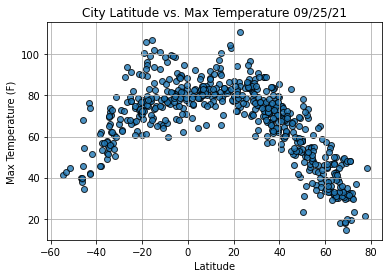

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

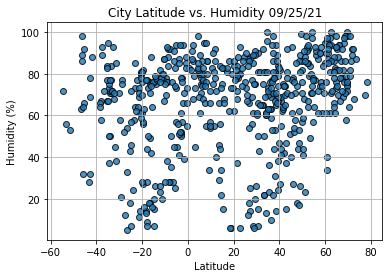

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

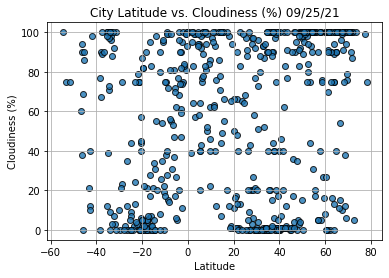

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

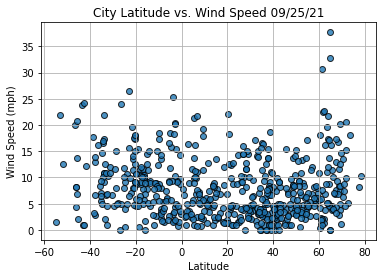

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Iqaluit
Country                        CA
Date          2021-09-25 15:04:16
Lat                       63.7506
Lng                      -68.5145
Max Temp                    31.73
Humidity                       86
Cloudiness                     75
Wind Speed                  11.01
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
570    False
571     True
572    False
573     True
574    False
Name: Lat, Length: 575, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Busteni,RO,2021-09-25 14:59:34,45.4000,25.5333,67.05,61,1,1.36
5,Provideniya,RU,2021-09-25 15:04:13,64.3833,-173.3000,30.61,83,100,8.75
7,Hilo,US,2021-09-25 15:04:14,19.7297,-155.0900,77.29,73,1,6.91
9,Ponta Do Sol,PT,2021-09-25 15:03:39,32.6667,-17.1000,77.63,75,93,1.70
11,Upernavik,GL,2021-09-25 15:04:15,72.7868,-56.1549,23.05,68,5,5.17


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

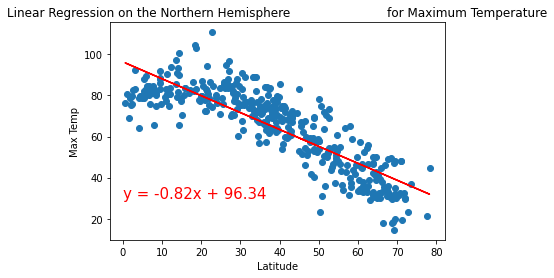

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,30))

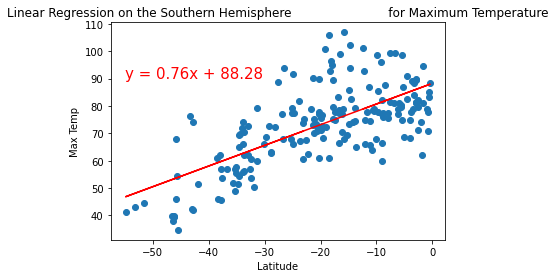

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

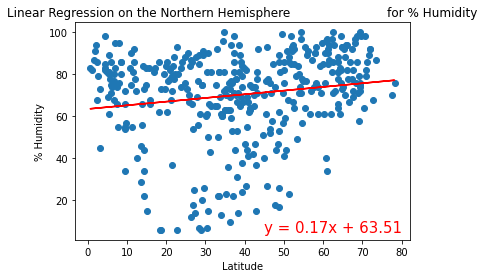

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,5))

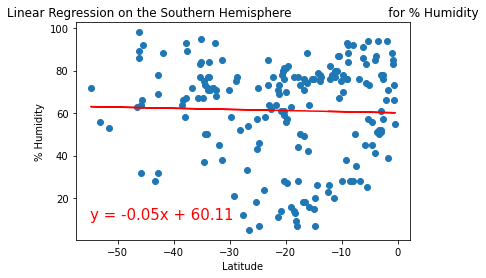

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,10))

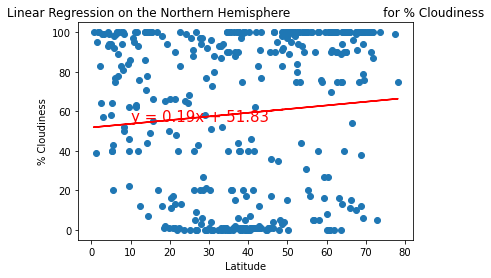

In [41]:
#Skill Drill on % Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(10,55))

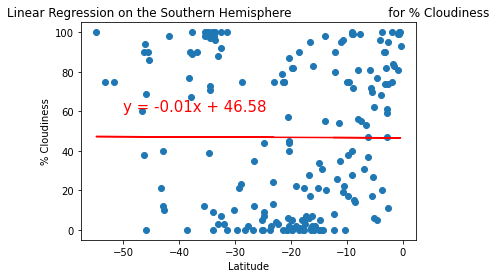

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

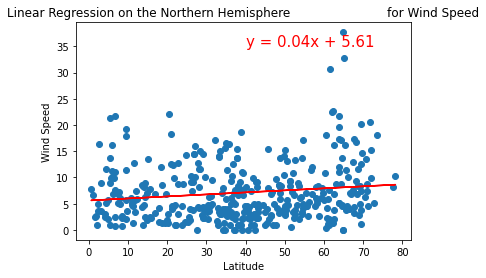

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

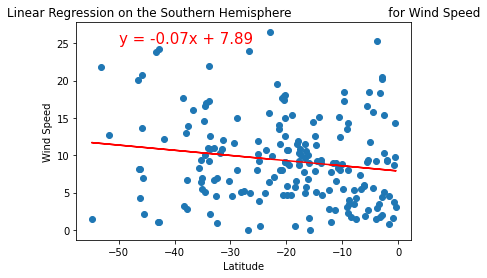

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))